In [284]:
import os
from Bio import SeqIO
from Bio import motifs
from Bio.Align import MultipleSeqAlignment as MSA
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Align.Applications import MuscleCommandline
#extracing file names
delta_fasta_files = os.listdir("delta")
omicron_fasta_files = os.listdir("omicron")

#renaming
for i in range(len(delta_fasta_files)):
    delta_fasta_files[i] = "delta/" + delta_fasta_files[i]
    omicron_fasta_files[i] = "omicron/" + omicron_fasta_files[i]

In [285]:
omicron_fasta_files

['omicron/EPI_ISL_16299833.fasta',
 'omicron/EPI_ISL_16299834.fasta',
 'omicron/EPI_ISL_16299835.fasta',
 'omicron/EPI_ISL_16299836.fasta',
 'omicron/EPI_ISL_16299837.fasta',
 'omicron/EPI_ISL_16299838.fasta',
 'omicron/EPI_ISL_16299839.fasta',
 'omicron/EPI_ISL_16299840.fasta',
 'omicron/EPI_ISL_16299841.fasta',
 'omicron/EPI_ISL_16299842.fasta']

In [286]:
delta_fasta_files

['delta/EPI_ISL_14594261.fasta',
 'delta/EPI_ISL_14594262.fasta',
 'delta/EPI_ISL_14594263.fasta',
 'delta/EPI_ISL_14594264.fasta',
 'delta/EPI_ISL_14594265.fasta',
 'delta/EPI_ISL_14594266.fasta',
 'delta/EPI_ISL_14594267.fasta',
 'delta/EPI_ISL_14594269.fasta',
 'delta/EPI_ISL_14594272.fasta',
 'delta/EPI_ISL_14594275.fasta']

In [287]:
refrence_sequences = []
for file_name in delta_fasta_files:
    with open(file_name) as handle:
        for record in SeqIO.parse(handle, "fasta"):
            refrence_sequences.append(record)

In [288]:
#inserting gaps at the end of the 
max_len = max([len(s.seq) for s in refrence_sequences])
GAPs = "-"
for seq in refrence_sequences:
    padding = GAPs*(max_len - len(seq.seq)) # creating the padding string
    seq.seq += padding


In [289]:
for s in refrence_sequences:
    print(len(s))

29851
29851
29851
29851
29851
29851
29851
29851
29851
29851


In [290]:
n = len(refrence_sequences[0])

profile_matrix = {
    'A': [0]*n,
    'C': [0]*n,
    'G': [0]*n,
    'T': [0]*n,
    'N': [0]*n,
    '-': [0]*n
    }

for a in refrence_sequences:
    for position, nucleotide in enumerate(a):
        profile_matrix[nucleotide][position] += 1
profile_matrix

{'A': [0,
  0,
  0,
  2,
  8,
  2,
  8,
  0,
  0,
  0,
  0,
  0,
  0,
  2,
  8,
  0,
  0,
  2,
  10,
  8,
  2,
  10,
  10,
  8,
  0,
  2,
  10,
  8,
  0,
  2,
  10,
  8,
  0,
  0,
  0,
  0,
  0,
  2,
  8,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  2,
  8,
  2,
  8,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  2,
  10,
  10,
  8,
  0,
  2,
  10,
  8,
  0,
  0,
  0,
  2,
  10,
  10,
  10,
  8,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  2,
  8,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  2,
  8,
  0,
  0,
  0,
  0,
  2,
  8,
  0,
  0,
  0,
  2,
  8,
  0,
  0,
  2,
  8,
  0,
  0,
  2,
  8,
  0,
  2,
  8,
  2,
  10,
  8,
  0,
  2,
  10,
  8,
  2,
  10,
  8,
  0,
  2,
  10,
  8,
  0,
  2,
  8,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  2,
  8,
  2,
  8,
  0,
  2,
  8,
  2,
  8,
  0,
  2,
  8,
  0,
  2,
  10,
  8,
  0,
  0,
  0,
  0,
  0,
  0,
  2,
  8,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  2,
  8,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  2,
  8,
  0,
  0,
  0,
  0,
  0,
  0,
  0,

In [291]:
result = []

for position in range(n):
    max_count = 0
    max_nucleotide = None
    for nucleotide in ['A', 'C', 'G', 'T']:
        count = profile_matrix[nucleotide][position]
        if count > max_count:
            max_count = count
            max_nucleotide = nucleotide
    result.append(max_nucleotide)

consensus = ''.join(result)
consensus

'GTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTTTTGCAGCCGATCATCAGCACATCTAGGTTTTGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAACATGAGCATGAAATTGCTTGGTACACGGAACGTTCTGAAAAG

In [292]:
case_sequences = []
for file_name in omicron_fasta_files:
    with open(file_name) as handle:
        for record in SeqIO.parse(handle, "fasta"):
            case_sequences.append(record)
            print(len(record))

29724
29718
29718
29718
29718
29718
29718
29718
29718
29744


In [293]:
#inserting gaps at the end of the 
max_len = max([len(s.seq) for s in case_sequences])
GAPs = "-"
for seq in case_sequences:
    padding = GAPs*(max_len - len(seq.seq)) # creating the padding string
    seq.seq += padding


In [294]:
for seq in case_sequences:
    print(len(seq))

29744
29744
29744
29744
29744
29744
29744
29744
29744
29744


In [295]:
align1 = MSA(case_sequences)

In [296]:
print(align1)

Alignment with 10 rows and 29744 columns
TTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTG...--- Varient_1
TTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTG...--- Varient_2
TTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTG...--- Varient_3
TTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTG...--- Varient_4
TTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTG...--- Varient_5
TTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTG...--- Varient_6
TTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTG...--- Varient_7
TTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTG...--- Varient_8
TTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTG...--- Varient_9
TTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTG...GTA Varient_10


In [297]:
#############################aligning all 20 sequences##################################
max_len = 29851
GAPs = "-"
for seq in case_sequences:
    padding = GAPs*(max_len - len(seq.seq)) # creating the padding string
    seq.seq += padding

In [298]:
align2 = MSA(refrence_sequences+case_sequences)

In [299]:
print(align2)

Alignment with 20 rows and 29851 columns
GTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCT...--- Original_1
TTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTT...--- Original_2
GTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCT...--- Original_3
GTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCT...--- Original_4
GTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCT...AAA Original_5
GTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCT...--- Original_6
GTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCT...AA- Original_7
GTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCT...--- Original_8
TTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTT...--- Original_9
GTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCT...--- Original_10
TTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTG...--- Varient_1
TTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTG...--- Varient_2
TTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTG...--- Varient_3
TTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTG...--- Varient_4
TTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTG...--- Varient_5
TTGTAGATCTGTTCTCTAAACGAACTTTAAAAT

In [300]:
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.PhyloXML import Phylogeny
from Bio import Phylo
# Recall Alignment
print(align2,'\n')

''' Calculate Distance Matrix'''
# From raw MSE alignment
# The ‘identity’ model can be used both for DNA and protein sequences

print('Distance Matrix')
calculator = DistanceCalculator('identity') # create calculator
dist_mat = calculator.get_distance(align2) # get the distance matrix of a given alignment object
print(dist_mat)

Alignment with 20 rows and 29851 columns
GTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCT...--- Original_1
TTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTT...--- Original_2
GTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCT...--- Original_3
GTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCT...--- Original_4
GTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCT...AAA Original_5
GTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCT...--- Original_6
GTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCT...AA- Original_7
GTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCT...--- Original_8
TTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTT...--- Original_9
GTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCT...--- Original_10
TTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTG...--- Varient_1
TTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTG...--- Varient_2
TTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTG...--- Varient_3
TTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTG...--- Varient_4
TTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTG...--- Varient_5
TTGTAGATCTGTTCTCTAAACGAACTTTAAAAT

In [301]:
''' Distance Tree Constructor '''
# 'nj' / 'upgma' tree construction approaches 

constructor = DistanceTreeConstructor(calculator,'nj') # initialise
tree = constructor.build_tree(align2) # main algorithm
print(tree)

Tree(rooted=False)
    Clade(branch_length=0, name='Inner18')
        Clade(branch_length=4.907184851459835e-06, name='Inner17')
            Clade(branch_length=0.00016259139141067743, name='Varient_4')
            Clade(branch_length=3.068626260427799e-05, name='Inner16')
                Clade(branch_length=0.00011737986164617881, name='Inner15')
                    Clade(branch_length=0.0005197035903319706, name='Varient_8')
                    Clade(branch_length=0.0028419143202907567, name='Inner13')
                        Clade(branch_length=0.004688607933290921, name='Inner12')
                            Clade(branch_length=0.0037304699651124415, name='Varient_10')
                            Clade(branch_length=0.0011604884617409453, name='Inner11')
                                Clade(branch_length=0.002498280522428023, name='Varient_9')
                                Clade(branch_length=0.004101163382298753, name='Varient_5')
                        Clade(branch_length=0.0

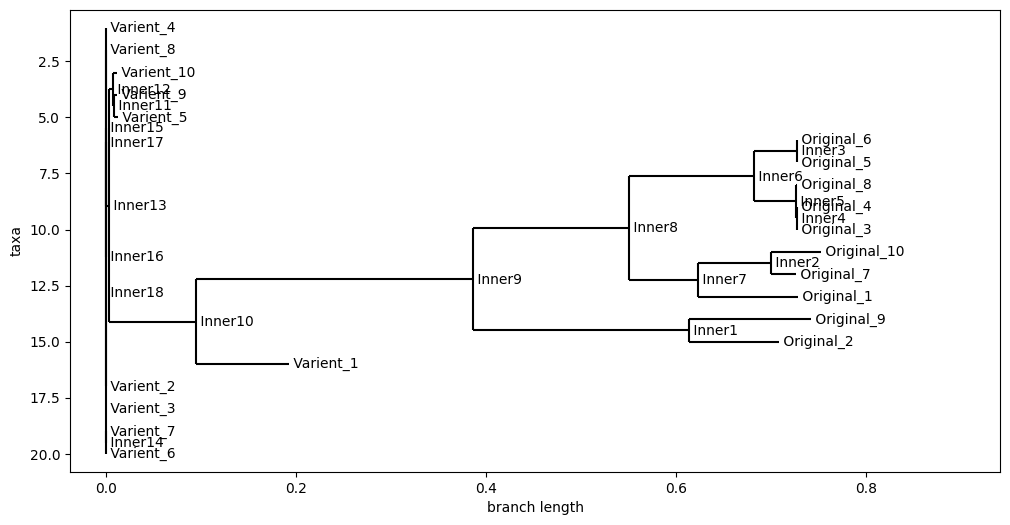

In [302]:
import matplotlib.pyplot as plt
# Plot Tree 
fig,axes = plt.subplots(1,1,figsize=(12,6))
treep = Phylogeny.from_tree(tree)
Phylo.draw(treep,axes=axes)

In [303]:
char = ["A","C","G","T","N","-"]
for i in range(len(case_sequences)):
    seq = case_sequences[i]
    l = len(seq)
    print("sequence: "+ str(i)+"                    consensus sequence")
    for c in char:
        print(f'"{c}" : {round(seq.count(c)*100/l, 1)}                       "{c}" : {round(consensus.count(c)*100/l, 1)}')


sequence: 0                    consensus sequence
"A" : 29.7                       "A" : 31.8
"C" : 18.2                       "C" : 18.0
"G" : 19.5                       "G" : 19.2
"T" : 32.1                       "T" : 31.0
"N" : 0.0                       "N" : 0.0
"-" : 0.4                       "-" : 0.0
sequence: 1                    consensus sequence
"A" : 29.8                       "A" : 31.8
"C" : 18.2                       "C" : 18.0
"G" : 19.5                       "G" : 19.2
"T" : 32.1                       "T" : 31.0
"N" : 0.0                       "N" : 0.0
"-" : 0.4                       "-" : 0.0
sequence: 2                    consensus sequence
"A" : 29.8                       "A" : 31.8
"C" : 18.2                       "C" : 18.0
"G" : 19.5                       "G" : 19.2
"T" : 32.1                       "T" : 31.0
"N" : 0.0                       "N" : 0.0
"-" : 0.4                       "-" : 0.0
sequence: 3                    consensus sequence
"A" : 29.8          

In [304]:
A = [round(consensus.count("A")*100/l,1)]
C = [round(consensus.count("C")*100/l,1)]
G = [round(consensus.count("G")*100/l,1)]
T = [round(consensus.count("T")*100/l,1)]
CG= [C[0]+G[0]]
char = ["A","C","G","T"]
arr = [A, C, G, T]

for i in range(len(case_sequences)):
    seq = case_sequences[i]
    l = len(seq)
    for j in range(len(char)):
        arr[j].append(round(case_sequences[i].count(char[j])*100/l,1))
      


In [305]:
arr

[[31.8, 29.7, 29.8, 29.8, 29.8, 29.3, 29.8, 29.8, 29.8, 29.4, 29.5],
 [18.0, 18.2, 18.2, 18.2, 18.2, 18.0, 18.2, 18.2, 18.2, 18.0, 18.1],
 [19.2, 19.5, 19.5, 19.5, 19.5, 19.3, 19.5, 19.5, 19.5, 19.3, 19.4],
 [31.0, 32.1, 32.1, 32.1, 32.1, 31.7, 32.1, 32.1, 32.1, 31.7, 31.8]]

In [306]:
_ = [(C[i] + G[i]) for i in range(10)]
CG = CG + _
arr.append(CG)


In [307]:
arr

[[31.8, 29.7, 29.8, 29.8, 29.8, 29.3, 29.8, 29.8, 29.8, 29.4, 29.5],
 [18.0, 18.2, 18.2, 18.2, 18.2, 18.0, 18.2, 18.2, 18.2, 18.0, 18.1],
 [19.2, 19.5, 19.5, 19.5, 19.5, 19.3, 19.5, 19.5, 19.5, 19.3, 19.4],
 [31.0, 32.1, 32.1, 32.1, 32.1, 31.7, 32.1, 32.1, 32.1, 31.7, 31.8],
 [37.2, 37.2, 37.7, 37.7, 37.7, 37.7, 37.3, 37.7, 37.7, 37.7, 37.3]]

In [308]:
d = [name.description for name in case_sequences]
description = ["Consensus"]
description = description + d


In [309]:
description

['Consensus',
 'Varient_1',
 'Varient_2',
 'Varient_3',
 'Varient_4',
 'Varient_5',
 'Varient_6',
 'Varient_7',
 'Varient_8',
 'Varient_9',
 'Varient_10']

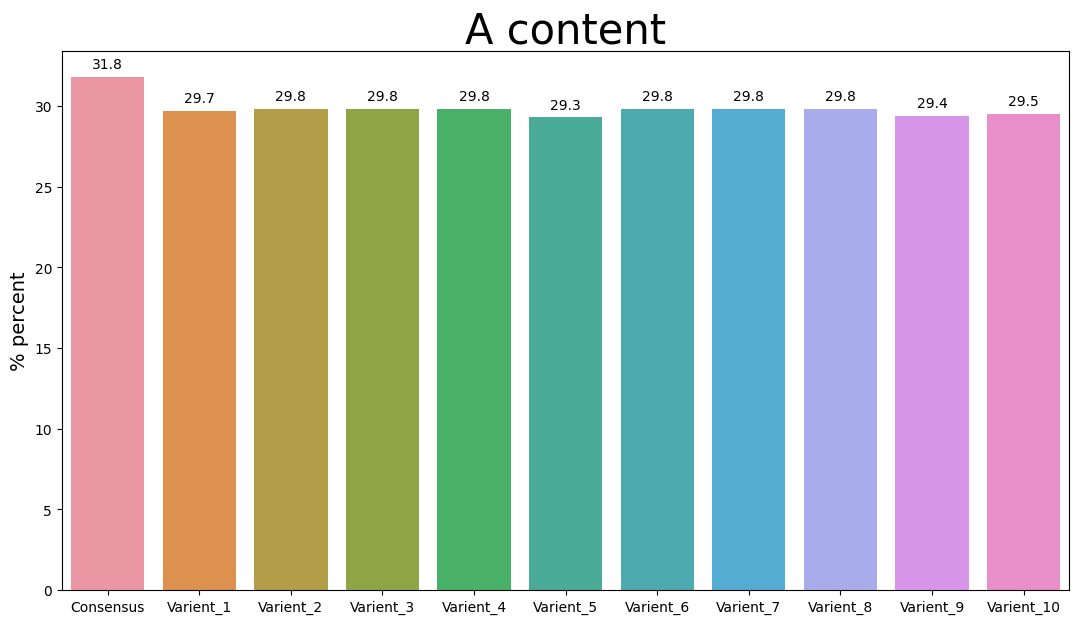

In [329]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
title = "A content"
data = arr[0]
dataf = pd.DataFrame({"":description, title:data})
plt.figure(figsize = (13, 7))
plt.title(title,size = 30)
splot = sns.barplot(x = "", y = title, data=dataf)
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

plt.ylabel("% percent", size = 14)
plt.show()

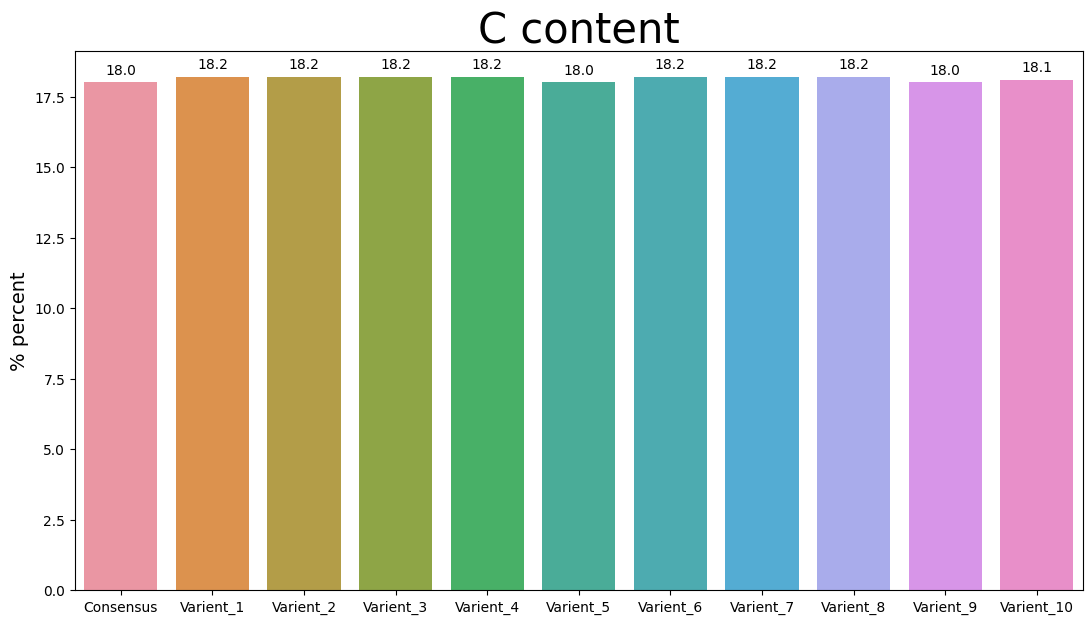

In [330]:

title = "C content"
data = arr[1]
dataf = pd.DataFrame({"":description, title:data})
plt.figure(figsize = (13, 7))
plt.title(title,size = 30)
splot = sns.barplot(x = "", y = title, data=dataf)
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

plt.ylabel("% percent", size = 14)
plt.show()

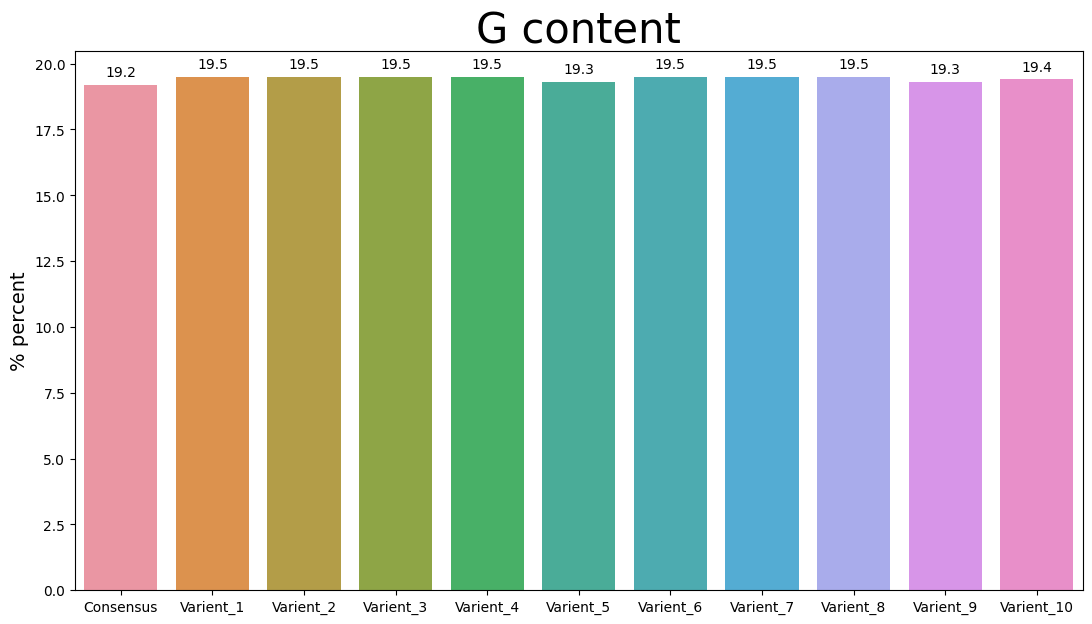

In [331]:

title = "G content"
data = arr[2]
dataf = pd.DataFrame({"":description, title:data})
plt.figure(figsize = (13, 7))
plt.title(title,size = 30)
splot = sns.barplot(x = "", y = title, data=dataf)
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

plt.ylabel("% percent", size = 14)
plt.show()

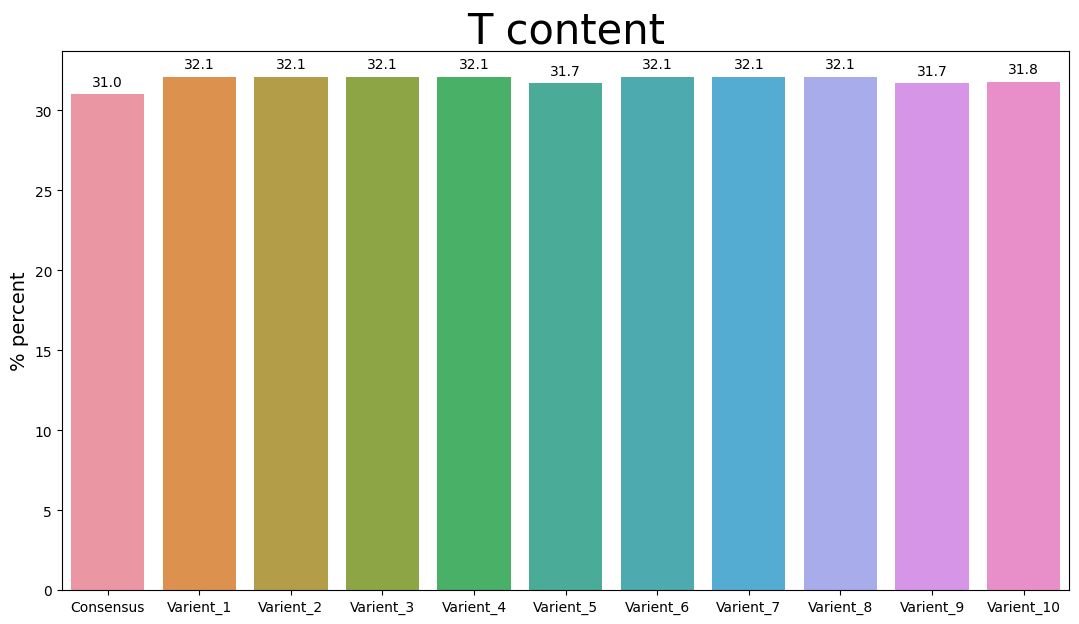

In [332]:
title = "T content"
data = arr[3]
dataf = pd.DataFrame({"":description, title:data})
plt.figure(figsize = (13, 7))
plt.title(title,size = 30)
splot = sns.barplot(x = "", y = title, data=dataf)
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

plt.ylabel("% percent", size = 14)
plt.show()

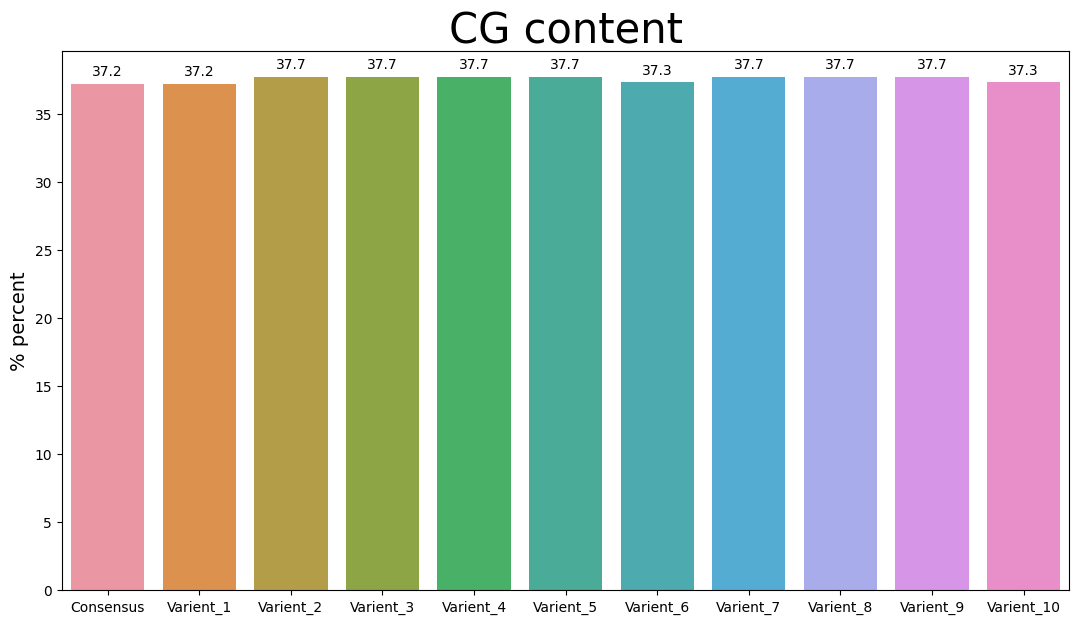

In [333]:
title = "CG content"
data = arr[4]
dataf = pd.DataFrame({"":description, title:data})
plt.figure(figsize = (13, 7))
plt.title(title,size = 30)
splot = sns.barplot(x = "", y = title, data=dataf)
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

plt.ylabel("% percent", size = 14)
plt.show()

In [335]:
score = []
dissimilar = []
for case_seq in case_sequences:
    al = MSA([SeqRecord(consensus),SeqRecord(case_seq)])
    s = 0
    for i in range(len(al[0].seq)):
        if al[0].seq[i] == al[1].seq[i]:
            s +=1
    score.append((s/len(al[0].seq))*100)
    dissimilar.append(100 - (s/len(al[0].seq))*100)
print(f'similar: {score}')
print(f'dissimilar: {dissimilar}')

similar: [26.953870892097413, 27.27211818699541, 27.26541824394493, 27.275468158520656, 26.943820977521693, 27.268768215470168, 27.268768215470168, 27.26541824394493, 26.984020635824596, 27.071119895480887]
dissimilar: [73.04612910790259, 72.72788181300459, 72.73458175605506, 72.72453184147935, 73.0561790224783, 72.73123178452983, 72.73123178452983, 72.73458175605506, 73.01597936417541, 72.92888010451911]


In [366]:
from Bio import AlignIO

alignment = AlignIO.read(open("clustalo.clustal_num"), "clustal")
arr = []
print("Alignment length %i" % alignment.get_alignment_length())
for record in alignment:
    arr.append(record.seq)
    print(record.seq)
    print("*"*100)

Alignment length 29868
GTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTTTTGCAGCCGATCATCAGCACATCTAGGTTTTGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGGGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAACATGAGCATGAAATTGCTTG

In [367]:
similar =0
dissimilar = 0
for i in range(len(arr[0])):
    if(arr[0][i]==arr[1][i]==arr[2][i]==arr[3][i]==arr[4][i]==arr[5][i]==arr[6][i]==arr[7][i]==arr[8][i]==arr[9][i]==arr[10][i]==arr[11][i]==arr[12][i]==arr[13][i]==arr[14][i]==arr[15][i]==arr[16][i]==arr[17][i]==arr[18][i]==arr[19][i]):
        similar +=1
    else:
        dissimilar +=1

(similar/len(arr[0]))*100
        
    

97.08048747823757

In [368]:
arr[0]

Seq('GTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTG...AAA')

In [369]:
from Bio import AlignIO

alignment = AlignIO.read(open("clustalo-consensuns-omicron.clustal_num"), "clustal")
arr = []
print("Alignment length %i" % alignment.get_alignment_length())
for record in alignment:
    arr.append(record.seq)
    print(record.seq)
    print("*"*100)

Alignment length 29878
GTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTTTTGCAGCCGATCATCAGCACATCTAGGTTTTGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAACATGAGCATGAAATTGCTTG

In [396]:
d = [name.description for name in case_sequences]
description = ["Consensus"]
description = description + d


In [406]:
similar =0
dissimilar = 0
flag = False
start = 0
single_letter = 0
short_indels = 0 #1<x<100
structure_vatient = 0 #100<x<1000
for i in range(len(arr[0])):
    if(arr[0][i]==arr[1][i]==arr[2][i]==arr[3][i]==arr[4][i]==arr[5][i]==arr[6][i]==arr[7][i]==arr[8][i]==arr[9][i]==arr[10][i]):
        similar +=1
        if not flag:
            print(f'start:{start}, end:{i}')
            print()
            if (i-start == 1):
                print("single letter varient\n")
                single_letter+=1
            elif (i-start <=100):
                print("short indel varient\n")
                short_indels+=1
            else:
                print("structure vartient\n")
                structure_vatient+=1
            for a in range(len(arr)):  
                print(str(arr[a][start:i])+ "            ->"+description[a])
            print()
            print("*"*100)
            print()
            start = i
        flag = True
    else:
        if flag:
            start = i
        dissimilar +=1
        flag = False

(similar/len(arr[0]))*100
        

start:0, end:43

short indel varient


****************************************************************************************************

start:202, end:203

single letter varient


****************************************************************************************************

start:662, end:663

single letter varient


****************************************************************************************************

start:1619, end:1620

single letter varient


****************************************************************************************************

start:2747, end:2748

single letter varient


****************************************************************************************************

start:2782, end:2783

single letter varient


****************************************************************************************************

start:2945, end:2946

single letter varient


*****************************************************************************

start:23502, end:23503

single letter varient


****************************************************************************************************

start:23513, end:23514

single letter varient


****************************************************************************************************

start:23516, end:23517

single letter varient


****************************************************************************************************

start:23521, end:23522

single letter varient


****************************************************************************************************

start:23524, end:23525

single letter varient


****************************************************************************************************

start:23551, end:23552

single letter varient


****************************************************************************************************

start:23587, end:23588

single letter varient


****************************************************

92.75386572059709

In [409]:
print(f'single_letter: {single_letter},   short_indels: {short_indels},   structure_vatient: {structure_vatient}')

single_letter: 1058,   short_indels: 204,   structure_vatient: 2
